In [1]:
!pip install xgboost pandas sklearn matplotlib seaborn

  Using cached https://files.pythonhosted.org/packages/a0/c5/d2238762d780dde84a20b8c761f563fe882b88c5a5fb03c056547c442a19/scikit_learn-0.21.3-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/cd/c1/50a758e8247561e58cb87305b1e90b171b8c767b15b12a1734001f41d356/joblib-0.13.2-py2.py3-none-any.whl
You are using pip version 19.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import os
import numpy as np
from scipy import stats
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
font = FontProperties(fname='font_ch.ttf', size=14)

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, roc_auc_score, auc, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import feature_selection

%matplotlib inline

In [12]:
df_train = pd.read_csv('./T-BrainAI_dataset/train.csv', encoding='big5')
Y1_mapping = {
    'Y': 1,
    'N': 0
}
df_train['Y1'] = df_train['Y1'].map(Y1_mapping)
df_train

df_train_Y1 = df_train[['Y1']]
df_train_Y1

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (17,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


CUS_ID GENDER AGE CHARGE_CITY_CD CONTACT_CITY_CD  EDUCATION_CD  \
0         3418      M   低             A1              A1           NaN   
1         4302      M   低             A1              A1           NaN   
2         5545      M   低             A1              A1           1.0   
3         7207      M   低             A1              A1           NaN   
4         7213      M   低             A1              A1           1.0   
...        ...    ...  ..            ...             ...           ...   
99995  2525675      F   高             A1              A1           3.0   
99996  2534462      F   高              E               E           1.0   
99997  2535679      F  中高             C2              C2           2.0   
99998  2544819      M   高             A1              A1           3.0   
99999  1994377      M   高             B1              B1           3.0   

       MARRIAGE_CD LAST_A_CCONTACT_DT  L1YR_A_ISSUE_CNT LAST_A_ISSUE_DT  ...  \
0              NaN                  Y                 0               N  ...   
1              NaN                  Y                 0               N  ...   
2              0.0                  Y                 1               Y  ...   
3              0.0                  Y                 0               N  ...   
4              0.0                  N                 0               N  ...   
...            ...                ...               ...             ...  ...   
99995          0.0                  N                 0               N  ...   
99996          0.0                  Y                 0               N  ...   
99997          1.0                  Y                 0               N  ...   
99998          1.0                  Y                 0               Y  ...   
99999          1.0                  Y                 4               Y  ...   

       L1YR_GROSS_PRE_AMT CUST_9_SEGMENTS_CD  FINANCETOOLS_A  FINANCETOOLS_B  \
0                0.000174                  C             NaN             NaN   
1                0.008724                  A             NaN             NaN   
2                0.005359                  A               Y               N   
3                0.000000                  C             NaN             NaN   
4                0.000603                  C             NaN             NaN   
...                   ...                ...             ...             ...   
99995            0.000439                  G             NaN             NaN   
99996            0.000000                  H               N               N   
99997            0.000000                  H             NaN             NaN   
99998            0.000504                  G             NaN             NaN   
99999            0.000404                  G             NaN             NaN   

       FINANCETOOLS_C  FINANCETOOLS_D  FINANCETOOLS_E FINANCETOOLS_F  \
0                 NaN             NaN             NaN            NaN   
1                 NaN             NaN             NaN            NaN   
2                   N               N               N              N   
3                 NaN             NaN             NaN            NaN   
4                 NaN             NaN             NaN            NaN   
...               ...             ...             ...            ...   
99995             NaN             NaN             NaN            NaN   
99996               Y               N               N              N   
99997             NaN             NaN             NaN            NaN   
99998             NaN             NaN             NaN            NaN   
99999             NaN             NaN             NaN            NaN   

      FINANCETOOLS_G Y1  
0                NaN  0  
1                NaN  0  
2                  N  0  
3                NaN  0  
4                NaN  0  
...              ... ..  
99995            NaN  0  
99996              N  1  
99997            NaN  1  
99998            NaN  0  
99999            NaN  0  

[100000 rows x 132 

Y1
0       0
1       0
2       0
3       0
4       0
...    ..
99995   0
99996   1
99997   1
99998   0
99999   0

[100000 rows x 1 columns]

In [13]:
df_test = pd.read_csv('./T-BrainAI_dataset/test.csv', encoding='big5')
df_test

CUS_ID GENDER AGE CHARGE_CITY_CD CONTACT_CITY_CD  EDUCATION_CD  \
0          1193      M   低             A1              A1           2.0   
1          1727      M   低             A1              A1           NaN   
2          3293      M   低             A1              A1           1.0   
3          4328      M   低             A1              A1           NaN   
4          5555      M   低             A1              A1           1.0   
...         ...    ...  ..            ...             ...           ...   
149995  2074085      F  中高             A1              A1           3.0   
149996  2095927      F   高             B1              B1           3.0   
149997  2125973      M   高             C1              C1           3.0   
149998  2511714      F   高              D               D           3.0   
149999  2558094      F   高              D              A1           1.0   

        MARRIAGE_CD LAST_A_CCONTACT_DT  L1YR_A_ISSUE_CNT LAST_A_ISSUE_DT  ...  \
0               0.0                  Y                 4               Y  ...   
1               0.0                  N                 0               N  ...   
2               0.0                  N                 0               N  ...   
3               0.0                  N                 0               N  ...   
4               0.0                  Y                 0               Y  ...   
...             ...                ...               ...             ...  ...   
149995          0.0                  Y                 0               N  ...   
149996          1.0                  Y                 1               Y  ...   
149997          1.0                  Y                 0               N  ...   
149998          1.0                  Y                 0               N  ...   
149999          1.0                  N                 0               N  ...   

        IF_ADD_INSD_IND L1YR_GROSS_PRE_AMT  CUST_9_SEGMENTS_CD  \
0                     Y           0.000151                   C   
1                     N           0.000000                   C   
2                     N           0.000090                   C   
3                     N           0.000000                   C   
4                     N           0.000179                   C   
...                 ...                ...                 ...   
149995              NaN           0.000122                   G   
149996              NaN           0.000104                   G   
149997              NaN           0.000225                   G   
149998              NaN           0.000000                   H   
149999              NaN           0.000000                   H   

        FINANCETOOLS_A  FINANCETOOLS_B  FINANCETOOLS_C  FINANCETOOLS_D  \
0                  NaN             NaN             NaN             NaN   
1                  NaN             NaN             NaN             NaN   
2                  NaN             NaN             NaN             NaN   
3                  NaN             NaN             NaN             NaN   
4                  NaN             NaN             NaN             NaN   
...                ...             ...             ...             ...   
149995             NaN             NaN             NaN             NaN   
149996             NaN             NaN             NaN             NaN   
149997             NaN             NaN             NaN             NaN   
149998               Y               N               N               N   
149999               N               N               N               N   

       FINANCETOOLS_E FINANCETOOLS_F FINANCETOOLS_G  
0                 NaN            NaN            NaN  
1                 NaN            NaN            NaN  
2                 NaN            NaN            NaN  
3                 NaN            NaN            NaN  
4                 NaN            NaN            NaN  
...               ...            ...            ...  
149995            NaN            NaN            NaN  
149996            NaN

In [14]:
nonNum_features_ordered = ['AGE', 'APC_1ST_AGE', 'RFM_R', 'REBUY_TIMES_CNT', 'LIFE_CNT', 'INSD_1ST_AGE']

nonNum_features = []
for feature in df_train.columns:
    try:
        if (df_train[feature].dtype == object):
            nonNum_features.append(feature)
    except TypeError as e:
        print(e)

print(f'{len(nonNum_features)} Non-num Features : {nonNum_features}\n')

Num_features = []
for feature in df_train.columns:
    try:
        if (df_train[feature].dtype == int) or (df_train[feature].dtype == float):
            Num_features.append(feature)
    except TypeError as e:
        print(e)

print(f'{len(Num_features)} Num Features : {Num_features}\n')

nonNum_features_t = []
for feature in df_test.columns:
    try:
        if df_test[feature].dtype == object:
            nonNum_features_t.append(feature)
    except TypeError as e:
        print(e)

print(f'{len(nonNum_features_t)} Non-num Features : {nonNum_features_t}\n')

Num_features_t = []
for feature in df_test.columns:
    try:
        if (df_test[feature].dtype == int) or (df_test[feature].dtype == float):
            Num_features_t.append(feature)
    except TypeError as e:
        print(e)

print(f'{len(Num_features_t)} Num Features : {Num_features_t}\n')

89 Non-num Features : ['GENDER', 'AGE', 'CHARGE_CITY_CD', 'CONTACT_CITY_CD', 'LAST_A_CCONTACT_DT', 'LAST_A_ISSUE_DT', 'LAST_B_ISSUE_DT', 'APC_1ST_AGE', 'INSD_1ST_AGE', 'IF_2ND_GEN_IND', 'RFM_R', 'REBUY_TIMES_CNT', 'LIFE_CNT', 'IF_ISSUE_A_IND', 'IF_ISSUE_B_IND', 'IF_ISSUE_C_IND', 'IF_ISSUE_D_IND', 'IF_ISSUE_E_IND', 'IF_ISSUE_F_IND', 'IF_ISSUE_G_IND', 'IF_ISSUE_H_IND', 'IF_ISSUE_I_IND', 'IF_ISSUE_J_IND', 'IF_ISSUE_K_IND', 'IF_ISSUE_L_IND', 'IF_ISSUE_M_IND', 'IF_ISSUE_N_IND', 'IF_ISSUE_O_IND', 'IF_ISSUE_P_IND', 'IF_ISSUE_Q_IND', 'IF_ADD_F_IND', 'IF_ADD_L_IND', 'IF_ADD_Q_IND', 'IF_ADD_G_IND', 'IF_ADD_R_IND', 'IF_ADD_IND', 'L1YR_PAYMENT_REMINDER_IND', 'L1YR_LAPSE_IND', 'LAST_B_CONTACT_DT', 'A_IND', 'B_IND', 'C_IND', 'LAST_C_DT', 'IF_S_REAL_IND', 'IF_Y_REAL_IND', 'IM_IS_A_IND', 'IM_IS_B_IND', 'IM_IS_C_IND', 'IM_IS_D_IND', 'X_A_IND', 'X_B_IND', 'X_C_IND', 'X_D_IND', 'X_E_IND', 'X_F_IND', 'X_G_IND', 'X_H_IND', 'IF_HOUSEHOLD_CLAIM_IND', 'IF_ISSUE_INSD_A_IND', 'IF_ISSUE_INSD_B_IND', 'IF_ISSUE_IN

In [16]:
# 類別資料獨立處理－有序無序、重要度
df_train_cate = pd.DataFrame()
for c in nonNum_features:
    df_train_cate[c] = df_train[c].fillna('None')

# AGE, APC_1ST_AGE, RFM_R, REBUY_TIMES_CNT, LIFE_CNT 有序類別改用Label Encoding
df_train_cate_order = pd.DataFrame()
labelencoder = LabelEncoder()
for c in nonNum_features_ordered:
    try:
        df_train_cate_order[c] = labelencoder.fit_transform(df_train_cate[c])
    except:
        print(c)

# 無序藍未使用 One hot encoding
t = pd.get_dummies(df_train_cate[[col for col in nonNum_features if (col not in nonNum_features_ordered)]])
df_train_cate_OHE = pd.DataFrame(t)

df_train_cate = pd.concat([df_train_cate_OHE, df_train_cate_order, df_train_Y1], axis=1)
df_train_cate.isnull().sum().sort_values()

m = df_train_cate.corr().abs()
m['Y1'].sort_values(ascending=False).head(20)

IF_ISSUE_M_IND_Y         1.616542e-15
IF_ISSUE_M_IND_N         1.616646e-15
IF_ISSUE_INSD_E_IND_Y    3.574289e-04
X_C_IND_None             8.795772e-04
X_E_IND_None             8.795772e-04
X_B_IND_None             8.795772e-04
X_F_IND_None             8.795772e-04
X_G_IND_None             8.795772e-04
X_D_IND_None             8.795772e-04
X_H_IND_None             8.795772e-04
X_A_IND_None             8.795772e-04
CONTACT_CITY_CD_B1       1.026297e-03
CONTACT_CITY_CD_A1       1.176809e-03
IF_ISSUE_INSD_M_IND_Y    1.231932e-03
FINANCETOOLS_E_Y         1.300361e-03
IF_ISSUE_O_IND_Y         1.531022e-03
IF_ISSUE_O_IND_N         1.531022e-03
IF_ISSUE_INSD_O_IND_Y    1.701354e-03
CONTACT_CITY_CD_C1       1.789089e-03
IF_Y_REAL_IND_N          2.094855e-03
Name: Y1, dtype: float64

In [20]:
# 數字欄位做特徵縮放
df_train_num = df_train[Num_features]

for c in df_train_num.columns:
    if c != 'CUS_ID':
        df_train_num[c] = df_train_num[c].fillna(df_train_num.groupby([c])['CUS_ID'].count().reset_index().sort_values('CUS_ID', ascending=False)[c][0])
    
df_train_num.isnull().sum().sort_values()
df_train_cate = df_train_cate.drop(['Y1'], axis=1)
df_train_new = pd.concat([df_train_cate, df_train_num], axis=1)

m_new = df_train_new.corr().abs()
m_new['Y1'].sort_values(ascending=True).head(10)

# X, y = df_train_new.iloc[:, :274].values, df_train_new.iloc[:, 274].values

# train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size=0.35, random_state=56)

# # Standardization (用Normalization的相關度結果一樣)
# # 1
# # https://medium.com/jameslearningnote/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC2-4%E8%AC%9B-%E8%B3%87%E6%96%99%E5%89%8D%E8%99%95%E7%90%86-missing-data-one-hot-encoding-feature-scaling-3b70a7839b4a
# df_train_num_sta = pd.DataFrame()
# for c in df_train_num.columns:
#     df_train_num_sta[c] = (df_train_num[c] - df_train_num[c].mean()) / df_train_num[c].std()

# 2
stdsc = StandardScaler()
stdsc.fit(train_x)
X_train_std = stdsc.transform(train_x)
X_valid_std = stdsc.transform(valid_x)
X_train_std

# # compare corrs
# m_sta = df_train_num_sta.corr().abs()
# m_sta['Y1'].sort_values(ascending=False).head(10)

EXPIRATION_AMT         0.000723
OCCUPATION_CLASS_CD    0.002268
L1YR_B_ISSUE_CNT       0.003821
CHANNEL_B_POL_CNT      0.005675
POLICY_VALUE_AMT       0.007749
FIRST_CANCER_AMT       0.009165
CUS_ID                 0.010091
TERMINATION_RATE       0.011712
ILL_ADDITIONAL_AMT     0.011819
BMI                    0.016046
Name: Y1, dtype: float64

In [38]:
df_train_new.iloc[:, 274]

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    1
99997    1
99998    0
99999    0
Name: Y1, Length: 100000, dtype: int64

In [8]:
# combine df_train_cate_OHE & df_train_num_sta
df_train_num_sta = df_train_num_sta.drop(['Y1'], axis=1)
# df_train_processed = pd.concat([df_train_cate_OHE, df_train_num_sta], axis=1)
df_train_processed = pd.concat([df_train_cate, df_train_num_sta], axis=1)
m_p = df_train_processed.corr().abs()
m_p['Y1'].sort_values(ascending=False).head(20)

### select features corr > 0.1
# selected = ['L1YR_A_ISSUE_CNT', 'LEVEL', 'AG_NOW_CNT', 'LAST_A_ISSUE_DT_Y', 'X_H_IND_Y', 'IF_ADD_INSD_IND_None', 'IF_ISSUE_I_IND_Y', 'LAST_A_CCONTACT_DT_Y', 'X_B_IND_Y']
# df_train_processed_s = df_train_processed[selected]

# split Y1 and train file, with train & valid
df_train_processed_Y1 = df_train_processed[['CUS_ID', 'Y1']]
df_train_processed = df_train_processed.drop(['CUS_ID', 'Y1'], axis=1)

# train_x, valid_x, train_y, valid_y = train_test_split(df_train_processed_s, df_train_processed_Y1, test_size=0.35, random_state=56)
train_x, valid_x, train_y, valid_y = train_test_split(df_train_processed, df_train_processed_Y1, test_size=0.35, random_state=56)

Y1                      1.000000
LAST_A_ISSUE_DT_Y       0.122550
LAST_A_ISSUE_DT_N       0.122550
L1YR_A_ISSUE_CNT        0.121897
LEVEL                   0.107340
X_H_IND_Y               0.106179
X_H_IND_N               0.106160
IF_ADD_INSD_IND_None    0.104731
IF_ISSUE_I_IND_Y        0.103050
IF_ISSUE_I_IND_N        0.103050
LAST_A_CCONTACT_DT_Y    0.102597
LAST_A_CCONTACT_DT_N    0.102597
AG_NOW_CNT              0.101031
X_B_IND_N               0.100791
X_B_IND_Y               0.100785
IF_ISSUE_Q_IND_Y        0.097838
IF_ISSUE_Q_IND_N        0.097838
CHANNEL_A_POL_CNT       0.096635
TOOL_VISIT_1YEAR_CNT    0.094471
IF_ADD_Q_IND_N          0.094068
Name: Y1, dtype: float64

In [9]:
# PCA 
pca = PCA(.95)
pca.fit(X_train_std)
X_train_pca = pca.transform(X_train_std)
X_valid_pca = pca.transform(X_valid_std)
# principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
# principalDf

# from sklearn.linear_model import LogisticRegression
# logisticRegr = LogisticRegression(solver = 'lbfgs')
# logisticRegr.fit(X_train_pca, train_y)
# logisticRegr.predict(X_valid_pca)
# logisticRegr.score(X_valid_pca, valid_y)

xgbc = XGBClassifier(solver = 'lbfgs')
xgbc.fit(X_train_pca, train_y)
xgbc.predict(X_valid_pca)
print(xgbc.score(X_valid_pca, valid_y)) # highest: 0.9805777777777778
# selected features result is lower than all features... 0.9793 vs 0.9794

valid_y_pred = xgbc.predict_proba(X_valid_pca)
auc_score = roc_auc_score(y_true=valid_y, y_score=valid_y_pred[:, 1])
acc = accuracy_score(y_true=valid_y, y_pred=valid_y_pred.argmax(axis=1))
print('Validation AUC: {:.3f}, Accuracy: {:.3f}'.format(auc_score, acc))

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, solver='lbfgs', subsample=1)

array([0, 0, 0, ..., 0, 0, 0])

0.9792285714285714
Validation AUC: 0.802, Accuracy: 0.979


共變異係數矩陣.shape= (274, 274)
共變異係數矩陣= [[ 1.00001538 -0.98660215 -0.08723434 ... -0.03293411  0.00820261
   0.02084364]
 [-0.98660215  1.00001538 -0.07655243 ...  0.03378439 -0.00861325
  -0.02008755]
 [-0.08723434 -0.07655243  1.00001538 ... -0.00501195  0.00246197
  -0.00472627]
 ...
 [-0.03293411  0.03378439 -0.00501195 ...  1.00001538  0.23672037
   0.00131436]
 [ 0.00820261 -0.00861325  0.00246197 ...  0.23672037  1.00001538
   0.18928245]
 [ 0.02084364 -0.02008755 -0.00472627 ...  0.00131436  0.18928245
   1.00001538]]
特徵向量.shape= (274, 274)
特徵向量= [[ 8.31617517e-03+0.j -1.47869225e-02+0.j -3.04421183e-02+0.j ...
   7.65944305e-04+0.j -1.39802637e-03+0.j  6.31294897e-04+0.j]
 [-8.23301295e-03+0.j  1.47607926e-02+0.j  3.04609836e-02+0.j ...
   7.65270049e-04+0.j -1.39679569e-03+0.j  6.30739172e-04+0.j]
 [-5.52232029e-04+0.j  2.38971990e-04+0.j  4.85553976e-05+0.j ...
   1.25398000e-04+0.j -2.28880494e-04+0.j  1.03353621e-04+0.j]
 ...
 [ 4.61000459e-02+0.j  1.08783858e-02+0.j  7.7546400

/opt/conda/lib/python3.6/site-packages/matplotlib/transforms.py:796: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)


<BarContainer object of 274 artists>

/opt/conda/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Explained variance ratio')

Text(0.5, 0, 'Principal components')

Text(0.5, 1.0, 'tot_train')

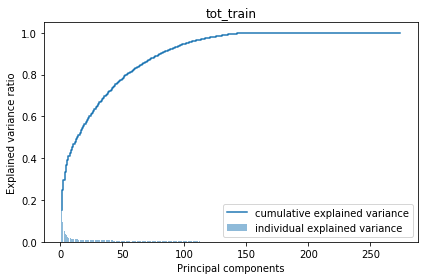

<BarContainer object of 274 artists>

Text(0, 0.5, 'Explained variance ratio')

Text(0.5, 0, 'Principal components')

Text(0.5, 1.0, 'tot_valid')

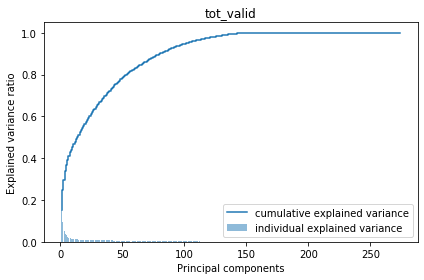

In [81]:
# PCA http://arbu00.blogspot.com/2017/02/6-principal-component-analysispca.html
# 共變異係數矩陣
cov_mat_train = np.cov(X_train_std.T)
print("共變異係數矩陣.shape=",cov_mat_train.shape)
print("共變異係數矩陣=",cov_mat_train)
cov_mat_valid = np.cov(X_valid_std.T)

# cov_mat之特徵向量&特徵值
eigen_vals_train, eigen_vecs_train = np.linalg.eig(cov_mat_train)
print("特徵向量.shape=",eigen_vecs_train.shape)
print("特徵向量=",eigen_vecs_train)
print("特徵值=",eigen_vals_train)
eigen_vals_valid, eigen_vecs_valid = np.linalg.eig(cov_mat_valid)

tot_train = sum(eigen_vals_train)
var_exp_train = [(i / tot_train) for i in sorted(eigen_vals_train, reverse=True)]
cum_var_exp_train = np.cumsum(var_exp_train)
print("各特徵值變異數比率：",var_exp_train)
print("特徵值變異數比率累加：",cum_var_exp_train)

tot_valid = sum(eigen_vals_valid)
var_exp_valid = [(i / tot_valid) for i in sorted(eigen_vals_valid, reverse=True)]
cum_var_exp_valid = np.cumsum(var_exp_valid)
 
#畫圖 ：解釋變異數比率 ，各特徵值/特徵值總和
plt.bar(range(1, 275), var_exp_train, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, 275), cum_var_exp_train, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('tot_train')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

plt.bar(range(1, 275), var_exp_valid, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, 275), cum_var_exp_valid, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('tot_valid')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [83]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs_train = [(np.abs(eigen_vals_train[i]), eigen_vecs_train[:, i])
               for i in range(len(eigen_vals_train))]
print("特徵值，特徵向量length：", len(eigen_pairs_train))
print("特徵值，特徵向量：", eigen_pairs_train)
# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs_train.sort(key=lambda k: k[0], reverse=True)
print("特徵值，特徵向量排序：",eigen_pairs_train.sort(key=lambda k: k[0], reverse=True))

#保留兩個最具影響力的特徵向量組成13x2 的投影矩陣W
w_train = np.hstack((eigen_pairs_train[0][1][:, np.newaxis],
               eigen_pairs_train[1][1][:, np.newaxis]))
print('Matrix W:\n', w_train)

特徵值，特徵向量length： 274
特徵值，特徵向量： [(41.23197001277248, array([ 8.31617517e-03+0.j, -8.23301295e-03+0.j, -5.52232029e-04+0.j,
        9.33022008e-03+0.j,  1.56878494e-02+0.j, -3.96170523e-02+0.j,
        1.82641419e-02+0.j,  1.15079740e-02+0.j,  1.29014520e-02+0.j,
        6.31728226e-03+0.j,  3.01045199e-03+0.j, -3.35062841e-03+0.j,
        5.08476983e-03+0.j, -1.21716947e-02+0.j,  7.43211169e-03+0.j,
        4.14356154e-03+0.j,  2.08652262e-03+0.j,  3.17364171e-04+0.j,
        9.80050386e-05+0.j, -7.98057000e-02+0.j,  7.98057000e-02+0.j,
       -5.36912451e-02+0.j,  5.36912451e-02+0.j, -1.02802825e-02+0.j,
        1.02802825e-02+0.j,  1.04939422e-02+0.j, -1.04939422e-02+0.j,
       -1.90079385e-02+0.j,  1.90079385e-02+0.j, -1.80017698e-02+0.j,
        1.80017698e-02+0.j, -3.52403135e-02+0.j,  3.52403135e-02+0.j,
       -4.73426293e-02+0.j,  4.73426293e-02+0.j, -2.16695889e-03+0.j,
        2.16695889e-03+0.j, -2.29899435e-02+0.j,  2.29899435e-02+0.j,
       -3.29149948e-02+0.j,  3.29149948

In [84]:
eigen_pairs_valid = [(np.abs(eigen_vals_valid[i]), eigen_vecs_valid[:, i])
               for i in range(len(eigen_vals_valid))]
print("特徵值，特徵向量length：", len(eigen_pairs_valid))
print("特徵值，特徵向量：", eigen_pairs_valid)

eigen_pairs_valid.sort(key=lambda k: k[0], reverse=True)
print("特徵值，特徵向量排序：",eigen_pairs_valid.sort(key=lambda k: k[0], reverse=True))

w_valid = np.hstack((eigen_pairs_valid[0][1][:, np.newaxis],
               eigen_pairs_valid[1][1][:, np.newaxis]))
print('Matrix W:\n', w_valid)

特徵值，特徵向量length： 274
特徵值，特徵向量： [(41.43020349472928, array([ 9.22350970e-03+0.j, -9.21939229e-03+0.j, -7.63961472e-05+0.j,
        9.17234104e-03+0.j,  1.61843954e-02+0.j, -3.98284266e-02+0.j,
        1.70242514e-02+0.j,  1.22797780e-02+0.j,  1.32354652e-02+0.j,
        7.06990321e-03+0.j,  1.96503246e-03+0.j, -4.21073560e-03+0.j,
        5.03374389e-03+0.j, -1.15572583e-02+0.j,  6.15414984e-03+0.j,
        5.09922345e-03+0.j,  2.40594226e-03+0.j,  1.52870725e-03+0.j,
        6.71080160e-04+0.j, -8.12432453e-02+0.j,  8.12432453e-02+0.j,
       -5.55250495e-02+0.j,  5.55250495e-02+0.j, -9.79056928e-03+0.j,
        9.79056928e-03+0.j,  1.17391758e-02+0.j, -1.17391758e-02+0.j,
       -2.09694285e-02+0.j,  2.09694285e-02+0.j, -1.72689410e-02+0.j,
        1.72689410e-02+0.j, -3.62050824e-02+0.j,  3.62050824e-02+0.j,
       -4.74377908e-02+0.j,  4.74377908e-02+0.j, -1.22651308e-03+0.j,
        1.22651308e-03+0.j, -2.50881253e-02+0.j,  2.50881253e-02+0.j,
       -3.24346156e-02+0.j,  3.24346156

Text(0.5, 0, 'PC 1')

Text(0, 0.5, 'PC 2')

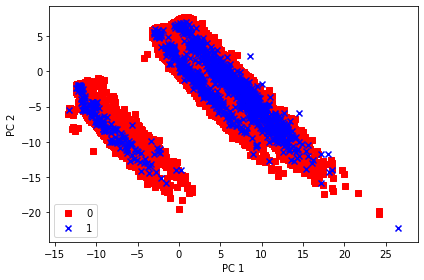

Text(0.5, 0, 'PC 1')

Text(0, 0.5, 'PC 2')

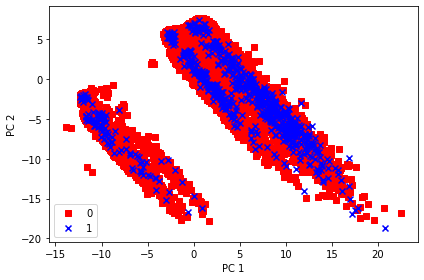

In [88]:
#畫出轉換後的數據集 散點圖
# print("X_train_std[0].dot(w)=",X_train_std[0].dot(w))
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(train_y), colors, markers):
    plt.scatter(X_train_pca[train_y == l, 0], 
                X_train_pca[train_y == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()


X_valid_pca = X_valid_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(valid_y), colors, markers):
    plt.scatter(X_valid_pca[valid_y == l, 0], 
                X_valid_pca[valid_y == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [87]:
X_train_pca
X_valid_pca

array([[ 2.94615395+0.j, -2.94059239+0.j],
       [-1.79936712+0.j,  3.83837092+0.j],
       [ 1.80546569+0.j,  4.75642928+0.j],
       ...,
       [ 0.56740809+0.j,  7.2828001 +0.j],
       [ 5.76290986+0.j, -0.65460035+0.j],
       [-2.87326122+0.j,  5.71451665+0.j]])

array([[  0.97063413+0.j,  -0.19632802+0.j],
       [ 11.42050152+0.j,  -7.94796417+0.j],
       [ -9.82672657+0.j,  -6.75677554+0.j],
       ...,
       [ -0.31632571+0.j,   6.77504001+0.j],
       [-12.01252177+0.j,  -2.5100075 +0.j],
       [  5.61170048+0.j,   1.02192622+0.j]])

In [90]:
# 決策分布圖
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

In [92]:
# from sklearn.linear_model import LogisticRegression
# lr = LogisticRegression()
# lr = lr.fit(X_train_pca, train_y)
# plot_decision_regions(X_train_pca, train_y, classifier=lr)
# plt.xlabel('PC 1')
# plt.ylabel('PC 2')
# plt.legend(loc='lower right')
# plt.tight_layout()
# plt.show()

xgbc = XGBClassifier()
mm = xgbc.fit(X_train_pca, train_y)
print(xgbc.score(X_valid_pca, valid_y)) # highest: 0.9805777777777778
# selected features result is lower than all features... 0.9793 vs 0.9794

valid_y_pred = xgbc.predict_proba(X_valid_pca)
auc_score = roc_auc_score(y_true=valid_y, y_score=valid_y_pred[:, 1])
acc = accuracy_score(y_true=valid_y, y_pred=valid_y_pred.argmax(axis=1))
print('Validation AUC: {:.3f}, Accuracy: {:.3f}'.format(auc_score, acc))


0.9794571428571428
Validation AUC: 0.733, Accuracy: 0.979


In [18]:
xgbc = XGBClassifier()
mm = xgbc.fit(train_x, train_y[['Y1']])
print(xgbc.score(valid_x, valid_y[['Y1']])) # highest: 0.9805777777777778
# selected features result is lower than all features... 0.9793 vs 0.9794

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9793142857142857


In [19]:
valid_y_pred = xgbc.predict_proba(valid_x)
valid_x_1 = valid_x.copy()
valid_x_1['predict_proba'] = valid_y_pred[:, 1]

auc_score = roc_auc_score(y_true=valid_y.Y1, y_score=valid_y_pred[:, 1])
acc = accuracy_score(y_true=valid_y.Y1, y_pred=valid_y_pred.argmax(axis=1))
print('Validation AUC: {:.3f}, Accuracy: {:.3f}'.format(auc_score, acc))
# all feature: Validation AUC: 0.835, Accuracy: 0.979
# selected feature: Validation AUC: 0.74, Accuracy: 0.979

Validation AUC: 0.835, Accuracy: 0.979


In [40]:
# 補眾數

for i in df_train.columns:
    if i != 'CUS_ID':
#         counts = np.bincount(df_train[i])
#         df_train[i] = df_train[i].fillna(stats.mode(df_train[i])[0][0])
        df_train[i] = df_train[i].fillna(df_train.groupby([i])['CUS_ID'].count().reset_index().sort_values('CUS_ID', ascending=False)[i][0])

for i in df_test.columns:
    if i != 'CUS_ID':
        df_test[i] = df_test[i].fillna(df_test.groupby([i])['CUS_ID'].count().reset_index().sort_values('CUS_ID', ascending=False)[i][0])

df_train

CUS_ID GENDER AGE CHARGE_CITY_CD CONTACT_CITY_CD  EDUCATION_CD  \
0         3418      M   低             A1              A1           1.0   
1         4302      M   低             A1              A1           1.0   
2         5545      M   低             A1              A1           1.0   
3         7207      M   低             A1              A1           1.0   
4         7213      M   低             A1              A1           1.0   
...        ...    ...  ..            ...             ...           ...   
99995  2525675      F   高             A1              A1           3.0   
99996  2534462      F   高              E               E           1.0   
99997  2535679      F  中高             C2              C2           2.0   
99998  2544819      M   高             A1              A1           3.0   
99999  1994377      M   高             B1              B1           3.0   

       MARRIAGE_CD LAST_A_CCONTACT_DT  L1YR_A_ISSUE_CNT LAST_A_ISSUE_DT  ...  \
0              0.0                  Y                 0               N  ...   
1              0.0                  Y                 0               N  ...   
2              0.0                  Y                 1               Y  ...   
3              0.0                  Y                 0               N  ...   
4              0.0                  N                 0               N  ...   
...            ...                ...               ...             ...  ...   
99995          0.0                  N                 0               N  ...   
99996          0.0                  Y                 0               N  ...   
99997          1.0                  Y                 0               N  ...   
99998          1.0                  Y                 0               Y  ...   
99999          1.0                  Y                 4               Y  ...   

       L1YR_GROSS_PRE_AMT CUST_9_SEGMENTS_CD  FINANCETOOLS_A  FINANCETOOLS_B  \
0                0.000174                  C               N               N   
1                0.008724                  A               N               N   
2                0.005359                  A               Y               N   
3                0.000000                  C               N               N   
4                0.000603                  C               N               N   
...                   ...                ...             ...             ...   
99995            0.000439                  G               N               N   
99996            0.000000                  H               N               N   
99997            0.000000                  H               N               N   
99998            0.000504                  G               N               N   
99999            0.000404                  G               N               N   

       FINANCETOOLS_C  FINANCETOOLS_D  FINANCETOOLS_E FINANCETOOLS_F  \
0                   N               N               N              N   
1                   N               N               N              N   
2                   N               N               N              N   
3                   N               N               N              N   
4                   N               N               N              N   
...               ...             ...             ...            ...   
99995               N               N               N              N   
99996               Y               N               N              N   
99997               N               N               N              N   
99998               N               N               N              N   
99999               N               N               N              N   

      FINANCETOOLS_G Y1  
0                  N  N  
1                  N  N  
2                  N  N  
3                  N  N  
4                  N  N  
...              ... ..  
99995              N  N  
99996              N  Y  
99997              N  Y  
99998              N  N  
99999              N  N  

[100000 rows x 132 

In [18]:
# 補指定值
fill_values = {
    'INSD_LAST_YEARDIF_CNT': 0.1724875816240972,
    'EDUCATION_CD': 3.0, 
    'APC_1ST_YEARDIF': 0.2587685984593603, 
    'LEVEL': 5.0, 
    'TERMINATION_RATE': 12.090984696216369
}

for i,j in fill_values.items():
    try:
        if (len(df_train[i]) > 0):
            df_train[i] = df_train[i].fillna(value=fill_values[i])
    except:
        print(i)
        
for i,j in fill_values.items():
    try:
        if (len(df_test[i]) > 0):
            df_test[i] = df_test[i].fillna(value=fill_values[i])
    except:
        print(i)

# df_train = df_train.fillna('None')
# df_train = df_train.fillna('None')
df_test

CUS_ID GENDER AGE CHARGE_CITY_CD CONTACT_CITY_CD  EDUCATION_CD  \
0          1193      M   低             A1              A1           2.0   
1          1727      M   低             A1              A1           3.0   
2          3293      M   低             A1              A1           1.0   
3          4328      M   低             A1              A1           3.0   
4          5555      M   低             A1              A1           1.0   
...         ...    ...  ..            ...             ...           ...   
149995  2074085      F  中高             A1              A1           3.0   
149996  2095927      F   高             B1              B1           3.0   
149997  2125973      M   高             C1              C1           3.0   
149998  2511714      F   高              D               D           3.0   
149999  2558094      F   高              D              A1           1.0   

        MARRIAGE_CD LAST_A_CCONTACT_DT  L1YR_A_ISSUE_CNT LAST_A_ISSUE_DT  ...  \
0               0.0                  Y                 4               Y  ...   
1               0.0                  N                 0               N  ...   
2               0.0                  N                 0               N  ...   
3               0.0                  N                 0               N  ...   
4               0.0                  Y                 0               Y  ...   
...             ...                ...               ...             ...  ...   
149995          0.0                  Y                 0               N  ...   
149996          1.0                  Y                 1               Y  ...   
149997          1.0                  Y                 0               N  ...   
149998          1.0                  Y                 0               N  ...   
149999          1.0                  N                 0               N  ...   

        IF_ADD_INSD_IND L1YR_GROSS_PRE_AMT  CUST_9_SEGMENTS_CD  \
0                     Y           0.000151                   C   
1                     N           0.000000                   C   
2                     N           0.000090                   C   
3                     N           0.000000                   C   
4                     N           0.000179                   C   
...                 ...                ...                 ...   
149995              NaN           0.000122                   G   
149996              NaN           0.000104                   G   
149997              NaN           0.000225                   G   
149998              NaN           0.000000                   H   
149999              NaN           0.000000                   H   

        FINANCETOOLS_A  FINANCETOOLS_B  FINANCETOOLS_C  FINANCETOOLS_D  \
0                  NaN             NaN             NaN             NaN   
1                  NaN             NaN             NaN             NaN   
2                  NaN             NaN             NaN             NaN   
3                  NaN             NaN             NaN             NaN   
4                  NaN             NaN             NaN             NaN   
...                ...             ...             ...             ...   
149995             NaN             NaN             NaN             NaN   
149996             NaN             NaN             NaN             NaN   
149997             NaN             NaN             NaN             NaN   
149998               Y               N               N               N   
149999               N               N               N               N   

       FINANCETOOLS_E FINANCETOOLS_F FINANCETOOLS_G  
0                 NaN            NaN            NaN  
1                 NaN            NaN            NaN  
2                 NaN            NaN            NaN  
3                 NaN            NaN            NaN  
4                 NaN            NaN            NaN  
...               ...            ...            ...  
149995            NaN            NaN            NaN  
149996            NaN

In [19]:
nonNum_values = {'AGE': '低', 'APC_1ST_AGE': '中高', 'A_IND': 'N', 'B_IND': 'N', 'CHARGE_CITY_CD': 'B1', 'CONTACT_CITY_CD': 'A1', 'CUST_9_SEGMENTS_CD': 'C', 'C_IND': 'N', 'FINANCETOOLS_A': 'Y', 'FINANCETOOLS_B': 'N', 'FINANCETOOLS_C': 'N', 'FINANCETOOLS_D': 'N', 'FINANCETOOLS_E': 'N', 'FINANCETOOLS_F': 'N', 'FINANCETOOLS_G': 'N', 'GENDER': 'F', 'IF_2ND_GEN_IND': 'Y', 'IF_ADD_F_IND': 'N', 'IF_ADD_G_IND': 'N', 'IF_ADD_IND': 'N', 'IF_ADD_INSD_F_IND': 'None', 'IF_ADD_INSD_G_IND': 'N', 'IF_ADD_INSD_IND': 'N', 'IF_ADD_INSD_L_IND': 'Y', 'IF_ADD_INSD_Q_IND': 'Y', 'IF_ADD_INSD_R_IND': 'N', 'IF_ADD_L_IND': 'N', 'IF_ADD_Q_IND': 'N', 'IF_ADD_R_IND': 'N', 'IF_HOUSEHOLD_CLAIM_IND': 'Y', 'IF_ISSUE_A_IND': 'N', 'IF_ISSUE_B_IND': 'N', 'IF_ISSUE_C_IND': 'N', 'IF_ISSUE_D_IND': 'N', 'IF_ISSUE_E_IND': 'N', 'IF_ISSUE_F_IND': 'N', 'IF_ISSUE_G_IND': 'N', 'IF_ISSUE_H_IND': 'N', 'IF_ISSUE_INSD_A_IND': 'N', 'IF_ISSUE_INSD_B_IND': 'N', 'IF_ISSUE_INSD_C_IND': 'N', 'IF_ISSUE_INSD_D_IND': 'N', 'IF_ISSUE_INSD_E_IND': 'N', 'IF_ISSUE_INSD_F_IND': 'N', 'IF_ISSUE_INSD_G_IND': 'N', 'IF_ISSUE_INSD_H_IND': 'N', 'IF_ISSUE_INSD_I_IND': 'N', 'IF_ISSUE_INSD_J_IND': 'N', 'IF_ISSUE_INSD_K_IND': 'N', 'IF_ISSUE_INSD_L_IND': 'N', 'IF_ISSUE_INSD_M_IND': 'N', 'IF_ISSUE_INSD_N_IND': 'N', 'IF_ISSUE_INSD_O_IND': 'N', 'IF_ISSUE_INSD_P_IND': 'N', 'IF_ISSUE_INSD_Q_IND': 'N', 'IF_ISSUE_I_IND': 'N', 'IF_ISSUE_J_IND': 'N', 'IF_ISSUE_K_IND': 'N', 'IF_ISSUE_L_IND': 'N', 'IF_ISSUE_M_IND': 'N', 'IF_ISSUE_N_IND': 'N', 'IF_ISSUE_O_IND': 'N', 'IF_ISSUE_P_IND': 'N', 'IF_ISSUE_Q_IND': 'N', 'IF_S_REAL_IND': 'N', 'IF_Y_REAL_IND': 'N', 'IM_IS_A_IND': 'N', 'IM_IS_B_IND': 'N', 'IM_IS_C_IND': 'N', 'IM_IS_D_IND': 'N', 'INSD_1ST_AGE': '中', 'L1YR_LAPSE_IND': 'N', 'L1YR_PAYMENT_REMINDER_IND': 'N', 'LAST_A_CCONTACT_DT': 'N', 'LAST_A_ISSUE_DT': 'N', 'LAST_B_CONTACT_DT': 'N', 'LAST_B_ISSUE_DT': 'N', 'LAST_C_DT': 'N', 'LIFE_CNT': '低', 'REBUY_TIMES_CNT': '低', 'RFM_R': '低', 'X_A_IND': 'N', 'X_B_IND': 'N', 'X_C_IND': 'N', 'X_D_IND': 'N', 'X_E_IND': 'N', 'X_F_IND': 'N', 'X_G_IND': 'N', 'X_H_IND': 'N'}

for i,j in nonNum_values.items():
    try:
        if df_train[i][0]:
            df_train[i] = df_train[i].fillna(value=nonNum_values[i])
    except KeyError as e:
        print(e)
        
for i,j in nonNum_values.items():
    try:
        if df_test[i][0]:
            df_test[i] = df_test[i].fillna(value=nonNum_values[i])
    except KeyError as e:
        print(e)

# for i in nonNum_features:
#     df_train.groupby(i)[i].count().plot(kind='bar')
#     plt.show()
df_test

CUS_ID GENDER AGE CHARGE_CITY_CD CONTACT_CITY_CD  EDUCATION_CD  \
0          1193      M   低             A1              A1           2.0   
1          1727      M   低             A1              A1           3.0   
2          3293      M   低             A1              A1           1.0   
3          4328      M   低             A1              A1           3.0   
4          5555      M   低             A1              A1           1.0   
...         ...    ...  ..            ...             ...           ...   
149995  2074085      F  中高             A1              A1           3.0   
149996  2095927      F   高             B1              B1           3.0   
149997  2125973      M   高             C1              C1           3.0   
149998  2511714      F   高              D               D           3.0   
149999  2558094      F   高              D              A1           1.0   

        MARRIAGE_CD LAST_A_CCONTACT_DT  L1YR_A_ISSUE_CNT LAST_A_ISSUE_DT  ...  \
0               0.0                  Y                 4               Y  ...   
1               0.0                  N                 0               N  ...   
2               0.0                  N                 0               N  ...   
3               0.0                  N                 0               N  ...   
4               0.0                  Y                 0               Y  ...   
...             ...                ...               ...             ...  ...   
149995          0.0                  Y                 0               N  ...   
149996          1.0                  Y                 1               Y  ...   
149997          1.0                  Y                 0               N  ...   
149998          1.0                  Y                 0               N  ...   
149999          1.0                  N                 0               N  ...   

        IF_ADD_INSD_IND L1YR_GROSS_PRE_AMT  CUST_9_SEGMENTS_CD  \
0                     Y           0.000151                   C   
1                     N           0.000000                   C   
2                     N           0.000090                   C   
3                     N           0.000000                   C   
4                     N           0.000179                   C   
...                 ...                ...                 ...   
149995                N           0.000122                   G   
149996                N           0.000104                   G   
149997                N           0.000225                   G   
149998                N           0.000000                   H   
149999                N           0.000000                   H   

        FINANCETOOLS_A  FINANCETOOLS_B  FINANCETOOLS_C  FINANCETOOLS_D  \
0                    Y               N               N               N   
1                    Y               N               N               N   
2                    Y               N               N               N   
3                    Y               N               N               N   
4                    Y               N               N               N   
...                ...             ...             ...             ...   
149995               Y               N               N               N   
149996               Y               N               N               N   
149997               Y               N               N               N   
149998               Y               N               N               N   
149999               N               N               N               N   

       FINANCETOOLS_E FINANCETOOLS_F FINANCETOOLS_G  
0                   N              N              N  
1                   N              N              N  
2                   N              N              N  
3                   N              N              N  
4                   N              N              N  
...               ...            ...            ...  
149995              N              N              N  
149996              N

In [20]:
Num_values_train = {'INSD_CNT': 15.0, 'ANNUAL_PREMIUM_AMT': 0.30, 'ANNUAL_INCOME_AMT': 0.20, 'TOOL_VISIT_1YEAR_CNT': 125.0, 'DIEBENEFIT_AMT': 0.30, 'DIEACCIDENT_AMT': 0.3, 'POLICY_VALUE_AMT': 0.35, 'EXPIRATION_AMT': 0.25, 'ILL_ACCELERATION_AMT': 0.40, 'L1YR_GROSS_PRE_AMT': 0.25, 'L1YR_A_ISSUE_CNT': 20}
Num_values_test = {'INSD_CNT': 15.0, 'ANNUAL_INCOME_AMT': 0.30, 'TOOL_VISIT_1YEAR_CNT': 150.0, 'EXPIRATION_AMT': 0.40, 'ILL_ACCELERATION_AMT': 0.35, 'ILL_ADDITIONAL_AMT': 0.25, 'L1YR_A_ISSUE_CNT': 20, 'L1YR_C_CNT': 30, 'ANNUITY_AMT': 0.30}

# for i,j in Num_values_train.items():
#     df_train = df_train[df_train[i] < Num_values_train[i]]
    
# for i,j in Num_values_test.items():
#     df_test = df_test[df_test[i] < Num_values_test[i]]

for i in Num_features:
    try:
        if df_train[i][0]:
            df_train[i] = df_train[i].fillna(value=df_train[i].mean())
    except KeyError as e:
        print(e)
    
for i in Num_features_t:
    try:
        if df_test[i][0]:
            df_test[i] = df_test[i].fillna(value=df_test[i].mean())
    except KeyError as e:
        print(e)

df_train

CUS_ID GENDER AGE CHARGE_CITY_CD CONTACT_CITY_CD  EDUCATION_CD  \
0         3418      M   低             A1              A1           3.0   
1         4302      M   低             A1              A1           3.0   
2         5545      M   低             A1              A1           1.0   
3         7207      M   低             A1              A1           3.0   
4         7213      M   低             A1              A1           1.0   
...        ...    ...  ..            ...             ...           ...   
99995  2525675      F   高             A1              A1           3.0   
99996  2534462      F   高              E               E           1.0   
99997  2535679      F  中高             C2              C2           2.0   
99998  2544819      M   高             A1              A1           3.0   
99999  1994377      M   高             B1              B1           3.0   

       MARRIAGE_CD LAST_A_CCONTACT_DT  L1YR_A_ISSUE_CNT LAST_A_ISSUE_DT  ...  \
0         0.315289                  Y                 0               N  ...   
1         0.315289                  Y                 0               N  ...   
2         0.000000                  Y                 1               Y  ...   
3         0.000000                  Y                 0               N  ...   
4         0.000000                  N                 0               N  ...   
...            ...                ...               ...             ...  ...   
99995     0.000000                  N                 0               N  ...   
99996     0.000000                  Y                 0               N  ...   
99997     1.000000                  Y                 0               N  ...   
99998     1.000000                  Y                 0               Y  ...   
99999     1.000000                  Y                 4               Y  ...   

       L1YR_GROSS_PRE_AMT CUST_9_SEGMENTS_CD  FINANCETOOLS_A  FINANCETOOLS_B  \
0                0.000174                  C               Y               N   
1                0.008724                  A               Y               N   
2                0.005359                  A               Y               N   
3                0.000000                  C               Y               N   
4                0.000603                  C               Y               N   
...                   ...                ...             ...             ...   
99995            0.000439                  G               Y               N   
99996            0.000000                  H               N               N   
99997            0.000000                  H               Y               N   
99998            0.000504                  G               Y               N   
99999            0.000404                  G               Y               N   

       FINANCETOOLS_C  FINANCETOOLS_D  FINANCETOOLS_E FINANCETOOLS_F  \
0                   N               N               N              N   
1                   N               N               N              N   
2                   N               N               N              N   
3                   N               N               N              N   
4                   N               N               N              N   
...               ...             ...             ...            ...   
99995               N               N               N              N   
99996               Y               N               N              N   
99997               N               N               N              N   
99998               N               N               N              N   
99999               N               N               N              N   

      FINANCETOOLS_G Y1  
0                  N  N  
1                  N  N  
2                  N  N  
3                  N  N  
4                  N  N  
...              ... ..  
99995              N  N  
99996              N  Y  
99997              N  Y  
99998              N  N  
99999              N  N  

[100000 rows x 132 

In [41]:
# Label Encoding
labelencoder = LabelEncoder()
df_train_1 = df_train.copy()
for i in nonNum_features:
    try:
        df_train_1[i] = labelencoder.fit_transform(df_train_1[i])
    except:
        print(i)

df_test_1 = df_test.copy()
for i in nonNum_features_t:
    try:
        if (len(df_test_1[i])>0):
            df_test_1[i] = labelencoder.fit_transform(df_test_1[i])
    except:
        print(i)

# df_train_1 = df_train.copy()
# df_train_1['IF_ISSUE_I_IND'] = labelencoder.fit_transform(df_train_1['IF_ISSUE_I_IND'])
# df_train_1['LAST_A_CCONTACT_DT'] = labelencoder.fit_transform(df_train_1['LAST_A_CCONTACT_DT'])
# df_train_1['IF_ISSUE_Q_IND'] = labelencoder.fit_transform(df_train_1['IF_ISSUE_Q_IND'])
# df_train_1['IF_ADD_Q_IND'] = labelencoder.fit_transform(df_train_1['IF_ADD_Q_IND'])
# df_train_1['IF_ADD_L_IND'] = labelencoder.fit_transform(df_train_1['IF_ADD_L_IND'])
# df_train_1['IF_ADD_IND'] = labelencoder.fit_transform(df_train_1['IF_ADD_IND'])
# df_train_1['IF_ISSUE_J_IND'] = labelencoder.fit_transform(df_train_1['IF_ISSUE_J_IND'])
# df_train_1['LAST_C_DT'] = labelencoder.fit_transform(df_train_1['LAST_C_DT'])
# df_train_1['IF_2ND_GEN_IND'] = labelencoder.fit_transform(df_train_1['IF_2ND_GEN_IND'])
# df_train_1['AGE'] = labelencoder.fit_transform(df_train_1['AGE'])
df_train_1

# df_test_1 = df_test.copy()
# df_test_1['IF_ISSUE_I_IND'] = labelencoder.fit_transform(df_test_1['IF_ISSUE_I_IND'])
# df_test_1['LAST_A_CCONTACT_DT'] = labelencoder.fit_transform(df_test_1['LAST_A_CCONTACT_DT'])
# df_test_1['IF_ISSUE_Q_IND'] = labelencoder.fit_transform(df_test_1['IF_ISSUE_Q_IND'])
# df_test_1['IF_ADD_Q_IND'] = labelencoder.fit_transform(df_test_1['IF_ADD_Q_IND'])
# df_test_1['IF_ADD_L_IND'] = labelencoder.fit_transform(df_test_1['IF_ADD_L_IND'])
# df_test_1['IF_ADD_IND'] = labelencoder.fit_transform(df_test_1['IF_ADD_IND'])
# df_test_1['IF_ISSUE_J_IND'] = labelencoder.fit_transform(df_test_1['IF_ISSUE_J_IND'])
# df_test_1['LAST_C_DT'] = labelencoder.fit_transform(df_test_1['LAST_C_DT'])
# df_test_1['IF_2ND_GEN_IND'] = labelencoder.fit_transform(df_test_1['IF_2ND_GEN_IND'])
# df_test_1['AGE'] = labelencoder.fit_transform(df_test_1['AGE'])
# df_test_1

CUS_ID  GENDER  AGE  CHARGE_CITY_CD  CONTACT_CITY_CD  EDUCATION_CD  \
0         3418       1    2               0                0           1.0   
1         4302       1    2               0                0           1.0   
2         5545       1    2               0                0           1.0   
3         7207       1    2               0                0           1.0   
4         7213       1    2               0                0           1.0   
...        ...     ...  ...             ...              ...           ...   
99995  2525675       0    3               0                0           3.0   
99996  2534462       0    3               7                7           1.0   
99997  2535679       0    1               5                5           2.0   
99998  2544819       1    3               0                0           3.0   
99999  1994377       1    3               2                2           3.0   

       MARRIAGE_CD  LAST_A_CCONTACT_DT  L1YR_A_ISSUE_CNT  LAST_A_ISSUE_DT  \
0              0.0                   1                 0                0   
1              0.0                   1                 0                0   
2              0.0                   1                 1                1   
3              0.0                   1                 0                0   
4              0.0                   0                 0                0   
...            ...                 ...               ...              ...   
99995          0.0                   0                 0                0   
99996          0.0                   1                 0                0   
99997          1.0                   1                 0                0   
99998          1.0                   1                 0                1   
99999          1.0                   1                 4                1   

       ...  L1YR_GROSS_PRE_AMT  CUST_9_SEGMENTS_CD  FINANCETOOLS_A  \
0      ...            0.000174                   2               0   
1      ...            0.008724                   0               0   
2      ...            0.005359                   0               1   
3      ...            0.000000                   2               0   
4      ...            0.000603                   2               0   
...    ...                 ...                 ...             ...   
99995  ...            0.000439                   6               0   
99996  ...            0.000000                   7               0   
99997  ...            0.000000                   7               0   
99998  ...            0.000504                   6               0   
99999  ...            0.000404                   6               0   

       FINANCETOOLS_B  FINANCETOOLS_C  FINANCETOOLS_D  FINANCETOOLS_E  \
0                   0               0               0               0   
1                   0               0               0               0   
2                   0               0               0               0   
3                   0               0               0               0   
4                   0               0               0               0   
...               ...             ...             ...             ...   
99995               0               0               0               0   
99996               0               1               0               0   
99997               0               0               0               0   
99998               0               0               0               0   
99999               0               0               0               0   

       FINANCETOOLS_F  FINANCETOOLS_G  Y1  
0                   0               0   0  
1                   0               0   0  
2                   0               0   0  
3                   0               0   0  
4                   0               0   0  
...               ...             ...  ..  
99995               0               0   0  
99996               0               0   1  
99997               0           

In [42]:
df_test_1

CUS_ID  GENDER  AGE  CHARGE_CITY_CD  CONTACT_CITY_CD  EDUCATION_CD  \
0          1193       1    2               0                0           2.0   
1          1727       1    2               0                0           1.0   
2          3293       1    2               0                0           1.0   
3          4328       1    2               0                0           1.0   
4          5555       1    2               0                0           1.0   
...         ...     ...  ...             ...              ...           ...   
149995  2074085       0    1               0                0           3.0   
149996  2095927       0    3               2                2           3.0   
149997  2125973       1    3               4                4           3.0   
149998  2511714       0    3               6                6           3.0   
149999  2558094       0    3               6                0           1.0   

        MARRIAGE_CD  LAST_A_CCONTACT_DT  L1YR_A_ISSUE_CNT  LAST_A_ISSUE_DT  \
0               0.0                   1                 4                1   
1               0.0                   0                 0                0   
2               0.0                   0                 0                0   
3               0.0                   0                 0                0   
4               0.0                   1                 0                1   
...             ...                 ...               ...              ...   
149995          0.0                   1                 0                0   
149996          1.0                   1                 1                1   
149997          1.0                   1                 0                0   
149998          1.0                   1                 0                0   
149999          1.0                   0                 0                0   

        ...  IF_ADD_INSD_IND  L1YR_GROSS_PRE_AMT  CUST_9_SEGMENTS_CD  \
0       ...                1            0.000151                   2   
1       ...                0            0.000000                   2   
2       ...                0            0.000090                   2   
3       ...                0            0.000000                   2   
4       ...                0            0.000179                   2   
...     ...              ...                 ...                 ...   
149995  ...                0            0.000122                   6   
149996  ...                0            0.000104                   6   
149997  ...                0            0.000225                   6   
149998  ...                0            0.000000                   7   
149999  ...                0            0.000000                   7   

        FINANCETOOLS_A  FINANCETOOLS_B  FINANCETOOLS_C  FINANCETOOLS_D  \
0                    0               0               0               0   
1                    0               0               0               0   
2                    0               0               0               0   
3                    0               0               0               0   
4                    0               0               0               0   
...                ...             ...             ...             ...   
149995               0               0               0               0   
149996               0               0               0               0   
149997               0               0               0               0   
149998               1               0               0               0   
149999               0               0               0               0   

        FINANCETOOLS_E  FINANCETOOLS_F  FINANCETOOLS_G  
0                    0               0               0  
1                    0               0               0  
2                    0               0               0  
3                    0               0               0  
4                    0               0               0  
...                ...     

In [93]:
# One hot encoding

t = pd.get_dummies(df_train)
df_train_1 = pd.DataFrame(t)
tt = pd.get_dummies(df_test)
df_test_1 = pd.DataFrame(tt)

df_train_1

CUS_ID  EDUCATION_CD  MARRIAGE_CD  L1YR_A_ISSUE_CNT  L1YR_B_ISSUE_CNT  \
0         3418           3.0     0.315289                 0                 0   
1         4302           3.0     0.315289                 0                 0   
2         5545           1.0     0.000000                 1                 0   
3         7207           3.0     0.000000                 0                 0   
4         7213           1.0     0.000000                 0                 0   
...        ...           ...          ...               ...               ...   
99995  2525675           3.0     0.000000                 0                 0   
99996  2534462           1.0     0.000000                 0                 0   
99997  2535679           2.0     1.000000                 0                 0   
99998  2544819           3.0     1.000000                 0                 0   
99999  1994377           3.0     1.000000                 4                 0   

       CHANNEL_A_POL_CNT  CHANNEL_B_POL_CNT  OCCUPATION_CLASS_CD  APC_CNT  \
0                      0                  0             1.000000        0   
1                      0                  0             1.000000        0   
2                      1                  0             1.000000        1   
3                      0                  0             1.000000        0   
4                      1                  0             1.000000        1   
...                  ...                ...                  ...      ...   
99995                  3                  0             1.304967        0   
99996                  1                  0             1.304967        0   
99997                  4                  0             1.000000        0   
99998                  2                  0             1.000000        0   
99999                  4                  0             1.000000        0   

       INSD_CNT  ...  FINANCETOOLS_D_N  FINANCETOOLS_D_Y  FINANCETOOLS_E_N  \
0             0  ...                 1                 0                 1   
1             0  ...                 1                 0                 1   
2             0  ...                 1                 0                 1   
3             0  ...                 1                 0                 1   
4             0  ...                 1                 0                 1   
...         ...  ...               ...               ...               ...   
99995         2  ...                 1                 0                 1   
99996         1  ...                 1                 0                 1   
99997         1  ...                 1                 0                 1   
99998         2  ...                 1                 0                 1   
99999         1  ...                 1                 0                 1   

       FINANCETOOLS_E_Y  FINANCETOOLS_F_N  FINANCETOOLS_F_Y  FINANCETOOLS_G_N  \
0                     0                 1                 0                 1   
1                     0                 1                 0                 1   
2                     0                 1                 0                 1   
3                     0                 1                 0                 1   
4                     0                 1                 0                 1   
...                 ...               ...               ...               ...   
99995                 0                 1                 0                 1   
99996                 0                 1                 0                 1   
99997                 0                 1                 0                 1   
99998                 0                 1                 0                 1   
99999                 0                 1                 0                 1   

       FINANCETOOLS_G_Y  Y1_N  Y1_Y  
0                     0     1     0  
1                     0     1     0  
2                     0     1     0  
3                     0     1     0  
4         

In [94]:
df_test_1

CUS_ID  EDUCATION_CD  MARRIAGE_CD  L1YR_A_ISSUE_CNT  \
0          1193           2.0          0.0                 4   
1          1727           3.0          0.0                 0   
2          3293           1.0          0.0                 0   
3          4328           3.0          0.0                 0   
4          5555           1.0          0.0                 0   
...         ...           ...          ...               ...   
149995  2074085           3.0          0.0                 0   
149996  2095927           3.0          1.0                 1   
149997  2125973           3.0          1.0                 0   
149998  2511714           3.0          1.0                 0   
149999  2558094           1.0          1.0                 0   

        L1YR_B_ISSUE_CNT  CHANNEL_A_POL_CNT  CHANNEL_B_POL_CNT  \
0                      0                  4                  0   
1                      0                  0                  0   
2                      0                  1                  0   
3                      0                  0                  0   
4                      0                  1                  0   
...                  ...                ...                ...   
149995                 0                  2                  0   
149996                 0                  1                  0   
149997                 0                  2                  0   
149998                 0                  2                  0   
149999                 0                  1                  0   

        OCCUPATION_CLASS_CD  APC_CNT  INSD_CNT  ...  FINANCETOOLS_C_N  \
0                       1.0        0         0  ...                 1   
1                       1.0        0         0  ...                 1   
2                       1.0        0         0  ...                 1   
3                       1.0        0         0  ...                 1   
4                       1.0        0         0  ...                 1   
...                     ...      ...       ...  ...               ...   
149995                  1.0        0         1  ...                 1   
149996                  1.0        0         1  ...                 1   
149997                  1.0        0         1  ...                 1   
149998                  1.0        0         1  ...                 1   
149999                  4.0        0         1  ...                 1   

        FINANCETOOLS_C_Y  FINANCETOOLS_D_N  FINANCETOOLS_D_Y  \
0                      0                 1                 0   
1                      0                 1                 0   
2                      0                 1                 0   
3                      0                 1                 0   
4                      0                 1                 0   
...                  ...               ...               ...   
149995                 0                 1                 0   
149996                 0                 1                 0   
149997                 0                 1                 0   
149998                 0                 1                 0   
149999                 0                 1                 0   

        FINANCETOOLS_E_N  FINANCETOOLS_E_Y  FINANCETOOLS_F_N  \
0                      1                 0                 1   
1                      1                 0                 1   
2                      1                 0                 1   
3                      1                 0                 1   
4                      1                 0                 1   
...                  ...               ...               ...   
149995                 1                 0                 1   
149996                 1                 0                 1   
149997                 1                 0                 1   
149998                 1                 0                 1   
149999                 1                 0                 1   

        FINANCETOOLS_F_Y  FINANC

In [69]:
# ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
train_array = df_train_1.values
X_train = train_array[:,0:131]
Y_train = train_array[:,131]
# X_train = train_array[:,0:249]
# Y_train = train_array[:,250]

model = ExtraTreesClassifier(n_estimators=10)
model.fit(X_train, Y_train)
print(model.feature_importances_)

[0.03130386 0.01451008 0.01487855 0.01547102 0.02345921 0.01585916
 0.01172701 0.00366037 0.00737356 0.00722408 0.00055267 0.00059032
 0.0114023  0.0022184  0.02199824 0.010378   0.00818809 0.01216235
 0.01566196 0.00758779 0.01490505 0.0070747  0.00928275 0.0082034
 0.0099711  0.0057816  0.00151207 0.00199677 0.00386642 0.00427062
 0.00057566 0.00222526 0.00380612 0.00016891 0.00527398 0.00640233
 0.00057117 0.00185356 0.00014255 0.00539624 0.00097197 0.0069484
 0.00417786 0.00473919 0.00401693 0.00384184 0.00099241 0.00546019
 0.00217328 0.01436632 0.00910092 0.01064745 0.00792782 0.02129909
 0.00442533 0.00560161 0.00805316 0.00585097 0.00490824 0.00141103
 0.00899785 0.00703122 0.01071577 0.02663973 0.02173266 0.01024672
 0.00729533 0.01256493 0.00162696 0.00898254 0.00588338 0.00997153
 0.00729086 0.00185014 0.00583151 0.01008392 0.00781519 0.00890804
 0.00049038 0.00092203 0.00645922 0.02283958 0.01845672 0.01971976
 0.00618078 0.01208649 0.00304774 0.01298299 0.01198375 0.010993

In [70]:
feature_importances = model.feature_importances_
df_feature_importances = pd.DataFrame(list(zip(df_train_1, feature_importances)), columns=['feature', 'importance'])
top10_importance_feature = df_feature_importances.sort_values('importance', ascending=False)[1:10]['feature'].values
top10_importance_feature

array(['INSD_LAST_YEARDIF_CNT', 'CONTACT_CITY_CD', 'TOOL_VISIT_1YEAR_CNT',
       'OCCUPATION_CLASS_CD', 'BMI', 'ANNUAL_INCOME_AMT',
       'DIEACCIDENT_AMT', 'DIEBENEFIT_AMT', 'EDUCATION_CD'], dtype=object)

In [71]:
# PCA
train_array = df_train_1.values
X_train = train_array[:,0:131]
Y_train = train_array[:,131]
pca = PCA(n_components=5)
fit = pca.fit(X_train)
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [9.99999999e-01 8.63380006e-10 4.52965366e-11 1.78817992e-11
 9.58565806e-12]
[[ 1.00000000e+00 -4.68950496e-08  3.84568264e-08  6.08652067e-07
   1.03827105e-06  8.11314949e-08  7.23415713e-08  6.08746998e-08
   2.71524364e-08  2.51857297e-08  1.44588285e-09  2.07619582e-09
   4.37483513e-07  3.27805420e-09  7.80277742e-08 -6.18485118e-08
   9.32250850e-08  1.16142477e-07  1.74500075e-08 -7.31082977e-08
   2.78072177e-08  1.22508317e-07  1.21685285e-07  2.47706042e-07
   3.36469642e-07  2.05623554e-08  2.25935287e-09  2.87353751e-09
   1.00498440e-08  1.71721492e-08 -3.05774394e-10  6.10751843e-09
   9.55434968e-09  6.07541787e-11  1.25990673e-08  2.68049854e-08
   9.38782378e-10  9.39546517e-10 -1.46612190e-10  1.19235652e-08
   3.83380834e-10  2.23582736e-08  3.93507522e-08  2.93732685e-08
   4.74108033e-08  4.60731181e-08  2.16289958e-09  4.24375909e-08
   5.71170395e-08 -3.02342222e-11  1.66243486e-07  1.13753995e-07
   1.25173666e-07 -1.14871109e-11  9.5642861

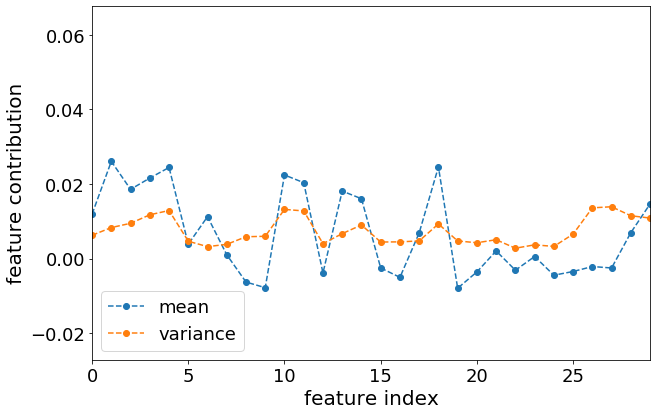

In [79]:
# https://jotterbach.github.io/2016/03/24/Principal_Component_Analysis/
n_comp = 30
pca_trafo = PCA(n_components=n_comp)
# data = ds.load_breast_cancer()['data']

z_scaler = StandardScaler()
z_data = z_scaler.fit_transform(X_train)

pca_data = pca_trafo.fit_transform(z_data)
pca_inv_data = pca_trafo.inverse_transform(np.eye(n_comp))

fig = plt.figure(figsize=(10, 6.5))
plt.plot(pca_inv_data.mean(axis=0), '--o', label = 'mean')
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('feature contribution', fontsize=20);
plt.xlabel('feature index', fontsize=20);
plt.tick_params(axis='both', which='major', labelsize=18);
plt.tick_params(axis='both', which='minor', labelsize=12);
plt.xlim([0, 29])
plt.legend(loc='lower left', fontsize=18)

In [43]:
# df_train_selected = df_train_1[top10_importance_feature]
# df_test_selected = df_test_1[top10_importance_feature]
df_train_result = df_train_1[['CUS_ID', 'Y1']]
df_train_result.columns = ['CUS_ID', 'result']
df_train_1 = df_train_1.drop(['CUS_ID', 'Y1'], axis=1)
# df_train_selected

In [13]:
# VarianceThreshold
sel = feature_selection.VarianceThreshold()
df_train_variance = sel.fit_transform(df_train_1)
print(len(df_train_variance.shape))
df_train_variance

2


array([[ 1.07537307,  0.46248844, -1.43093048, ..., -0.04955822,
        -0.11011476, -0.1835135 ],
       [ 1.07537307,  0.46248844, -1.43093048, ..., -0.04955822,
        -0.11011476, -0.1835135 ],
       [ 1.07537307,  0.46248844, -1.43093048, ..., -0.04955822,
        -0.11011476, -0.1835135 ],
       ...,
       [-0.92990984, -0.42467743,  1.95082859, ..., -0.04955822,
        -0.11011476, -0.1835135 ],
       [ 1.07537307,  1.3496543 , -1.43093048, ..., -0.04955822,
        -0.11011476, -0.1835135 ],
       [ 1.07537307,  1.3496543 , -0.07822685, ..., -0.04955822,
        -0.11011476, -0.1835135 ]])

In [55]:
# Remove highly correlated features
# corr_matrix = df_train_1.corr().abs()
# corr_matrix['Y1'].sort_values(ascending=False).head(10)
# to_drop = []
# for i in corr_matrix.columns:
#     for j in corr_matrix.columns.difference([i]):
#         if corr_matrix[i][j] > 0.50:
#             to_drop.append(j)
# to_drop = [column for column in corr_matrix.columns if any(corr_matrix[column] > 0.50)]
# print('Columns to drop: ' , (len(to_drop)))

# # SelectKBest 
# from sklearn.feature_selection import SelectKBest, f_classif
# # feature extraction
# k_best = SelectKBest(score_func=f_classif, k=100)
# # fit on train set
# fit = k_best.fit(df_train_1.values, df_train_result['result'])
# # transform train set
# univariate_features = fit.transform(df_train_1.values)
# univariate_features

# # RFE
# from sklearn.feature_selection import RFE
# # feature extraction
# rfe = RFE(rfc, n_features_to_select=100)
# # fit on train set
# fit = rfe.fit(df_train_1.values, df_train_result['result'])
# # transform train set
# recursive_features = fit.transform(df_train_1.values)

# SelectFromModel
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
# define model
rfc = RandomForestClassifier(n_estimators=100)
# feature extraction
select_model = feature_selection.SelectFromModel(rfc)
# fit on train set
fit = select_model.fit(df_train_1.values, df_train_result['result'])
# transform train set
model_features = fit.transform(df_train_1.values)
model_features

array([[1.000000e+00, 2.000000e+00, 0.000000e+00, ..., 1.741360e-04,
        2.000000e+00, 0.000000e+00],
       [1.000000e+00, 2.000000e+00, 0.000000e+00, ..., 8.724480e-03,
        0.000000e+00, 0.000000e+00],
       [1.000000e+00, 2.000000e+00, 0.000000e+00, ..., 5.359099e-03,
        0.000000e+00, 1.000000e+00],
       ...,
       [0.000000e+00, 1.000000e+00, 5.000000e+00, ..., 0.000000e+00,
        7.000000e+00, 0.000000e+00],
       [1.000000e+00, 3.000000e+00, 0.000000e+00, ..., 5.037770e-04,
        6.000000e+00, 0.000000e+00],
       [1.000000e+00, 3.000000e+00, 2.000000e+00, ..., 4.039650e-04,
        6.000000e+00, 0.000000e+00]])

In [110]:
# split train and valid
train_x, valid_x, train_y, valid_y = train_test_split(df_train_1, df_train_result, test_size=0.35, random_state=56)

In [113]:
xgbc = XGBClassifier()

In [117]:
mm = xgbc.fit(train_x, train_y[['result']])

In [118]:
print(xgbc.score(valid_x, valid_y[['result']])) # 0.9805777777777778

1.0


In [119]:
valid_y_pred = xgbc.predict_proba(valid_x)
valid_x_1 = valid_x.copy()
valid_x_1['predict_proba'] = valid_y_pred[:, 1]

auc_score = roc_auc_score(y_true=valid_y.result, y_score=valid_y_pred[:, 1])
acc = accuracy_score(y_true=valid_y.result, y_pred=valid_y_pred.argmax(axis=1))
print('Validation AUC: {:.3f}, Accuracy: {:.3f}'.format(auc_score, acc))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [81]:
targetset = df_test_1.copy()
print(targetset.shape)

test_y_pred = xgbc.predict_proba(targetset[r])
test_x_1 = targetset.copy()
test_x_1['predict_proba'] = test_y_pred[:, 1]
print(test_x_1.shape)

(150000, 250)
(150000, 251)


In [82]:
test_y_pred

array([[0.9605471 , 0.03945289],
       [0.998583  , 0.00141698],
       [0.9951908 , 0.00480923],
       ...,
       [0.97308517, 0.02691483],
       [0.9871548 , 0.01284523],
       [0.9835772 , 0.01642279]], dtype=float32)

In [83]:
output = pd.concat((targetset[['CUS_ID']], test_x_1['predict_proba']), axis=1)
print(output.shape)
output

(150000, 2)


CUS_ID  predict_proba
0          1193       0.039453
1          1727       0.001417
2          3293       0.004809
3          4328       0.003063
4          5555       0.018629
...         ...            ...
149995  2074085       0.101643
149996  2095927       0.200088
149997  2125973       0.026915
149998  2511714       0.012845
149999  2558094       0.016423

[150000 rows x 2 columns]

In [84]:
out = output.groupby('CUS_ID', as_index=False).mean()
out = out[['CUS_ID', 'predict_proba']]
out.columns = ['CUS_ID', 'Ypred']
out.to_csv('output_190922_7_xgboost_allFeatureProcessed_oneHot.csv') # 補特定值AUC 在rfc上升 在xg卻下降
out

CUS_ID     Ypred
0             3  0.044354
1             5  0.155073
2            20  0.030895
3            48  0.024515
4            49  0.165504
...         ...       ...
149995  2591999  0.015753
149996  2592019  0.023329
149997  2592023  0.043090
149998  2592034  0.030617
149999  2592064  0.004961

[150000 rows x 2 columns]